<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
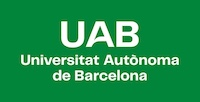
</div>
</div>
<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;"><b>104346 - Processament de Senyal, Imatge i Vídeo</b></p>
    <p style="margin: 0; text-align:right;">Grau en Enginyeria de Dades</p>
    <p style="margin: 0; text-align:right;">Universitat Autònoma de Barcelona (UAB)</p>
</div>
<div style="width: 100%; clear: both;"></div>
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    Nom, cognoms i NIU: David Morillo Massagué (1666540)
</div>

# **Laboratori 4-1**: Predicció del nivell de l'embassament de Sau (_TSA_)

En aquesta activitat analitzarem com evoluciona el nivell d'aigua d'un embassament des del punt de vista de la predicció de sèries temporals (_time series forecasting_, **TSF**). És a dir, el nostre objectiu principal serà **crear un model predictiu** que ens permeti predir com evolucionarà el nivell de l'aigua en aquest embassament en el futur a partir de les dades històriques del mateix.

Les dades emprades en aquest exemple han estat extretes de l'Agència Catalana de l'Aigua [ACA](http://aca.gencat.cat). En concret, s'han obtingut les dades sobre l'[embassament de Sau](https://es.wikipedia.org/wiki/Embalse_de_Sau), ubicat a Catalunya, en el període comprès entre els anys 2007 i 2019.

<u>Format de l'entrega</u>:
- Cal entregar el _notebook_ **executat, sense errors i amb els resultats** de totes les cel·les (en format `.ipynb`).
- Addicionalment, també cal entregar l'exportació del _notebook_ executat en format **HTML** (`File` -> `Save and export notebook as...` -> `HTML`).

## Adquisició de dades

En primer lloc, cal notar que les dades originals obtingudes de l'ACA estan en format XML, de manera que el primer pas és convertir aquest tipus de document en un format de taula, on cada fila representa una observació i cada columna un atribut. 

En aquest cas concret, hem obtingut observacions amb una **freqüència diària** i **cinc atributs** diferents de l'embassament. Els atributs es presenten a la taula següent:

<center><img src="figs/sau-datos.png" /></center>

Com podem veure a la taula, les dades obtingudes proporcionen informació sobre el volum d'entrada i sortida de l'embassament (en $hm^3/s$), el volum total d'aigua (en $hm^3$), el percentatge de capacitat de l'embassament i el nivell de la superfície de l'aigua de l'embassament (en metres sobre el nivell del mar). 

En aquest cas, hem escollit la variable **volum**, expressada en $hm^3$, com el valor de referència que farem servir per a aquesta anàlisi.

Algunes de les llibreries necessàries per resoldre aquesta activitat són:

In [117]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


# set warnings off
import warnings
warnings.filterwarnings('ignore')

## Exercici 1: Càrrega de les dades (_1 punt_)

En el primer exercici, es demana:
1. Carregar el conjunt de dades (`datasets/data_sau.csv`), incloent exclusivament l'atribut `Volum`, en una variable de `Numpy` o `Pandas`, revisant (i corregint, si cal) la presència de valors nuls o errònis en les dades. Només cal tenir en compte les dades posteriors al dia 1 de gener de l'any 1991. És a dir, **descartarem totes les dades anteriors al 01/01/1991**.
2. Descripció del conjunt de dades, on s'indiqui (com a mínim) el tamany del _dataset_, tipus de dades i rang de les dades de l'atribut `Volum`. 
3. Anàlisi descriptiu bàsic de la dades, on s'indiqui (com a mínim) el valor mig i la desviació estàndar per cadascun dels anys de l'atribut `Volum`. Es poden utilitzar gràfics tipus _boxplot_ per mostrar aquesta informació.

In [118]:
file_path = 'datasets/data_sau.csv'

df = pd.read_csv(file_path, sep=";", encoding="utf-8")

print(f"{len(df)} registres importats")

df['Dia'] = pd.to_datetime(df['Dia'], format='%Y-%m-%d')
df = df[df['Dia'] >= '1991-01-01']

print(f"{len(df)} registres utilitzats\n")

vol = df['Volum'].values

print(f"Rang de volum:")
print(f"Min: {min(vol)}")
print(f"Max: {max(vol)}\n")

mean = vol.mean()
std_dev = vol.std()

print(f"Mitjana: {mean}\n")
print(f"Desviació típica: {std_dev}\n")

print(df.head())

print(f"\nTipus de dades dels elements de volum: {vol.dtype}")

11961 registres importats
10135 registres utilitzats

Rang de volum:
Min: 21.077
Max: 165.05200000000002

Mitjana: 108.72795903712758

Desviació típica: 31.17483886628888

            Dia  Entrada  Grup12  Nivell    Percent  Sortida   Volum
1826 1991-01-01   6.5972     NaN  406.51  49.874743   0.0000  82.423
1827 1991-01-02   7.6042     NaN  406.68  50.266247   0.0810  83.070
1828 1991-01-03   7.2222     NaN  406.53  49.920731  13.8194  82.499
1829 1991-01-04   7.4421     NaN  406.36  49.529832  14.9653  81.853
1830 1991-01-05   8.6806     NaN  406.42  49.667796   6.0185  82.081

Tipus de dades dels elements de volum: float64


Importem un total de 11961 registres dels quals fem servir 10135 (posteriors al 1/1/1991).

El tipus de dades per a cada element és float64, la mitjana és de 108.72795903712758 hm3 i la desviació típica de 31.17483886628888 hm3.

Les dades varien entre els valors d'entre 21.077 i 165.052 hm3

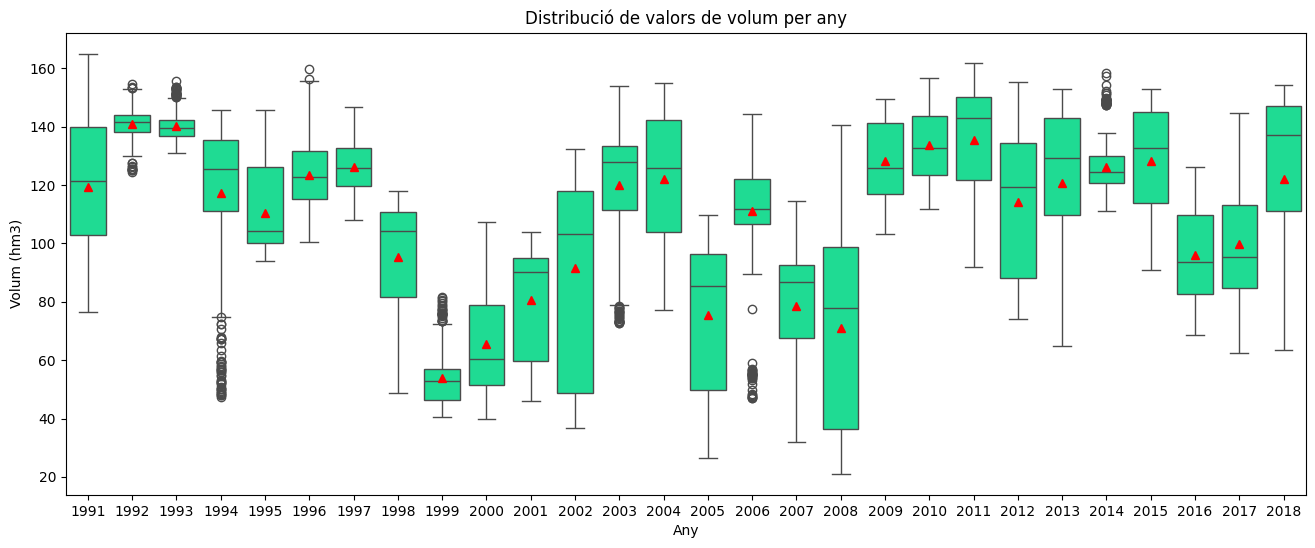

In [119]:
df['Year'] = df['Dia'].dt.year # Afegim una columna al dataframe per a diferenciar fàcilment entre anys

plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='Year', y='Volum', color="mediumspringgreen", showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"red"})
#sns.stripplot(data=df, x='Year', y='Volum', color='black', size=1, jitter=True)
plt.title('Distribució de valors de volum per any')
plt.xlabel('Any')
plt.ylabel('Volum (hm3)')
plt.show()

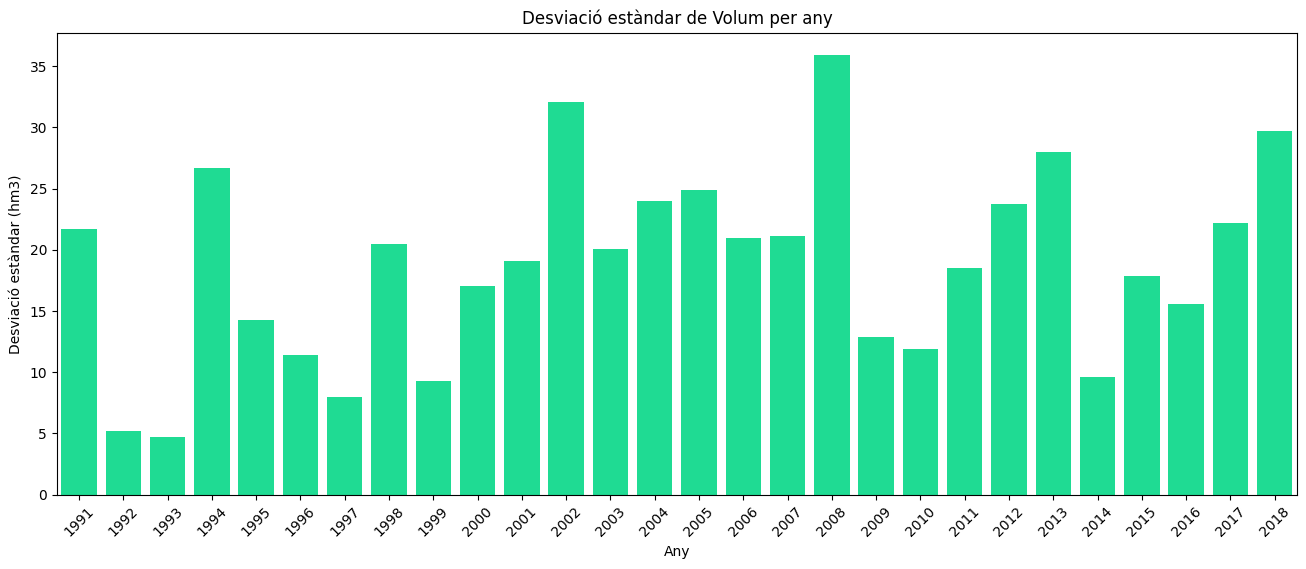

In [120]:
std_by_year = df.groupby('Year')['Volum'].std()

plt.figure(figsize=(16, 6))
sns.barplot(x=std_by_year.index, y=std_by_year.values, color='mediumspringgreen')
plt.title('Desviació estàndar de Volum per any')
plt.xlabel('Any')
plt.ylabel('Desviació estàndar (hm3)')
plt.xticks(rotation=45)
plt.show()

A partir d'aquests gràfic podem extraure les següents conlusions:
- Variabilitat anual: Hi ha una variabilitat significativa en el volum d’aigua any rere any. Els anys 1994, 1998, 2008 i 2018 són alguns dels que més variavilitat presenten, mentre que el 1992 i 1993 tenen els mínims valors d'aquesta.
- Dades Extremes: Els boxplots indiquen la presència de valors extrems o anomalies en les dades. Per exemple, els anys 1994, 2003 i 2006 presenten valors extrems (baixos), i els anys 1993, 1999 i 2014, presenten alguns valors molt alts.
- Mitjana: La mitjana, marcada en vermell, proporciona una referència visual de la centralitat de les dades cada any.

## Exercici 2: Preparació de les dades (_6 punts_)

En aquest cas tractem amb un problema **univariant**, ja que només hem seleccionat una de les variables o els atributs disponibles. 

Però hem de seleccionar dos paràmetres molt importants:
- El nombre de dies previs que farem servir per al model predictiu.
- El nombre de passos a què volem formular les prediccions.

Per aquest cas, suposarem que volem fer una **predicció a 15 dies**. És a dir, volem que el model d'aprenentatge automàtic ens mostri els valors futurs per als propers 15 dies. Aquest paràmetre es defineix a partir dels requeriments del problema, però lògicament cal tenir en compte que les prediccions a llarg termini solen tenir un error molt més gran que les prediccions a curt termini.

Pel que fa al nombre de dies previs que emprarà el model per generar la predicció, aquest paràmetre generalment involucra algunes proves per determinar el valor òptim o, almenys, un valor acceptable. En el nostre cas, després de fer algunes proves hem decidit fixar el **nombre de dies previs en 15 dies**, com en el cas anterior.

En resum, el model utilitzarà els valors reals del volum d'aigua dels darrers 15 dies per generar una predicció del volum per als propers 15 dies. 

El conjunt de dades haurà de tenir l'estructura que es mostra a la taula:

<center><img src="figs/sau-datos-preproc.png" width="540" /></center>

Es demana implementar:
1. **Normalitzar** els valors de l'atribut `Volum` en el **rang [0,1]** (amb tipus `float32` o `float64`). Comprova el tamany de l'_array_ resultant, així com els valors mínim i màxim.
2. **Generar el conjunt de dades** necessari per poder entrenar un model supervisat d'aprenentatge automàtic. Les característiques d'aquest conjunt de dades es detallen a continuació:
- Per generar aquesta estructura a partir de les dades originals, emprarem el **mètode de la finestra lliscant** (_sliding window method_) amb una amplada de finestra (_window width_) igual a 15.
- Cal separar les dades d'entrada del model (generalment etiquetades com **X**) de les dades de sortida del model (és a dir, les dades que volem que el model aprengui a generar, normalment etiquetades com **y**).

La sortida d'aquest procés han de ser dos conjunts de dades, generades a partir del _dataset_ original, que compleixin les següents condicions:
- El conjunt d'entrades (**X**) haurà de ser un `array` de `numpy` amb dimensions: **(num_reg, 15)**. On cada fila de l'_array_ serà una instància d'entrenament, el valor "num_reg" l'heu de calcular a partir de les dades originals i el mètode de les finestres lliscants, i el valor 15 és l'amplada de finestra que hem determinat (és a dir, hi haurà 15 atributs per cada instància o registre).
- El conjunt de sortides (**y**) haurà de ser un `array` de `numpy` amb dimensions: **(num_reg, 15)**. On cada fila de l'_array_ serà el valor de sortida que volem que el model aprengui a generar, el valor "num_reg" ha de coincidir amb la variable anterior, i el valor 15 és indica que volem fer prediccions a 15 dies vista (és a dir, és un paràmetre que hem fixat i indica que hi haurà 15 atributs de sortida per cada instància o registre).

<u>Notes</u>:
- Per normalitzar les dades podeu fer servir, entre d'altres, la funció `MinMaxScaler` de la llibreria `sklearn.preprocessing`.

In [121]:
from sklearn.preprocessing import MinMaxScaler

In [122]:
data = vol.reshape(-1, 1)
scaler = MinMaxScaler()
normalitzat = scaler.fit_transform(data).flatten() # Normalitzem les dades

print("\nNormalised data:")
print(normalitzat)
print(f"\nMax. value: {np.max(normalitzat)}") # Comprovem que el màxim és 1
print(f"Min. value: {np.min(normalitzat)}") # Comprovem que el mínim és 0

print(f"\nData type: {normalitzat.dtype}")


Normalised data:
[0.42608786 0.4305817  0.42661573 ... 0.82581901 0.82704798 0.8295912 ]

Max. value: 1.0
Min. value: 0.0

Data type: float64


In [123]:
n_dies = 15

X = []
Y = []

for i in range(len(normalitzat) - n_dies*2):
    t_0 = i + n_dies # Índex de l'element de T=0
    X.append(normalitzat[i:t_0]) # 15 dies abans de T=0
    Y.append(normalitzat[t_0:t_0 + n_dies]) # 15 dies després de T=0

X = np.array(X)
Y = np.array(Y)

print("Dimensions de X (conjunt d'entrades):", X.shape)
print("Dimensions de y (conjunt de sortides):", Y.shape, "\n")

#print(X)

print(f"Array original (primers 30 elements): \n{normalitzat[0:30]}\n")
print(f"Primers 15 elements de X (fila 1): \n{X[0]}\n")
print(f"Primers 15 elements de Y (fila 1): \n{Y[0]}\n")

print(f"Comprovem que la extensió de la 1a fila de X i la 1a fila de Y correspon als primers 30 elements de l'array original: \n{np.array_equal(np.concatenate((X[0], Y[0])), normalitzat[0:30])}")

Dimensions de X (conjunt d'entrades): (10105, 15)
Dimensions de y (conjunt de sortides): (10105, 15) 

Array original (primers 30 elements): 
[0.42608786 0.4305817  0.42661573 0.42212884 0.42371245 0.42767147
 0.43110957 0.42424032 0.42344852 0.42212884 0.42080917 0.42054523
 0.42582393 0.43031776 0.42767147 0.42450425 0.42001736 0.41420385
 0.41816288 0.42133704 0.42529606 0.42080917 0.4160514  0.41446779
 0.41159229 0.40310471 0.4067095  0.41005036 0.40696649 0.39950686]

Primers 15 elements de X (fila 1): 
[0.42608786 0.4305817  0.42661573 0.42212884 0.42371245 0.42767147
 0.43110957 0.42424032 0.42344852 0.42212884 0.42080917 0.42054523
 0.42582393 0.43031776 0.42767147]

Primers 15 elements de Y (fila 1): 
[0.42450425 0.42001736 0.41420385 0.41816288 0.42133704 0.42529606
 0.42080917 0.4160514  0.41446779 0.41159229 0.40310471 0.4067095
 0.41005036 0.40696649 0.39950686]

Comprovem que la extensió de la 1a fila de X i la 1a fila de Y correspon als primers 30 elements de l'array or

## Exercici 3. Conjunts d'entrenament i test (_2 punts_)

A l'**aprenentatge supervisat**, el conjunt d'**entrenament** i el conjunt de **test** són dos conjunts de dades diferents utilitzats per entrenar i avaluar un model predictiu.

- **Conjunt d'entrenament**: Aquest conjunt de dades es fa servir per entrenar el model. Consisteix en exemples d'entrada (variables independents) juntament amb les sortides corresponents (variables dependents o etiquetes). El model aprèn aquestes dades per poder fer prediccions precises.
- **Conjunt de test**: Aquest conjunt de dades s'utilitza per avaluar el rendiment del model un cop ha estat entrenat. Les dades de test (o prova) són diferents de les dades d'entrenament i no es fan servir durant el procés d'entrenament. S'utilitzen per mesurar el model davant de dades noves i no vistes anteriorment. El rendiment del model s'avalua comparant les prediccions del model amb les etiquetes veritables en el conjunt de test.

Dividir el conjunt de dades en un conjunt d'entrenament i un conjunt de test és crucial per avaluar la capacitat del model per generalitzar dades noves i no vistes. Això ajuda a evitar el sobreajustament del model al conjunt de dades d'entrenament i permet estimar com es comportarà el model a la pràctica.

Es demana implementar:
1. **Dividir el conjunt de dades (X i y)** en dos subconjunts (disjunts) per entrenament i test. Assignarem un 30% de les dades a test, i el 70% restant a dades d'entrenament.

La sortida d'aquest procés han de ser quatre variables per a l'entrenament del model predictiu, **amb els noms que s'indiquen a continuació**:

- `train_X`: variable amb les dades d'entrada del model ($X_i$). En aquest cas concret, tindrem 15 valors per a cada fila, atès que hem determinat utilitzar els 15 dies anteriors per fer els pronòstics.
- `test_X`: variables amb les dades d'entrada del model però reservades per a la fase de test.
- `train_Y`: variables amb les dades de sortida del model ($Y_i$). En aquest cas, també tindrem 15 valors perquè volem que el model faci prediccions a futur de 15 dies.
- `test_Y`: variables amb les dades de sortida del model, però reservades per a la fase de test.

<u>Notes</u>:
- Per dividir el conjunt de dades en entrenament i test, podeu fer servir la funció `train_test_split` de la llibreria `sklearn.model_selection`.

In [124]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=3537)

print("Mida de train_X:", train_X.shape)
print("Mida de test_X:", test_X.shape)
print("Mida de train_Y:", train_Y.shape)
print("Mida de test_Y:", test_Y.shape)

Mida de train_X: (7073, 15)
Mida de test_X: (3032, 15)
Mida de train_Y: (7073, 15)
Mida de test_Y: (3032, 15)


## Creació del model predictiu

Un cop tenim el conjunt de dades preparades, podem començar amb la creació del model predictiu i el seu entrenament. 

Hi ha una gran diversitat de models d'aprenentatge automàtic, cadascun amb certes característiques, virtuts i defectes. Queda fora de l'abast d'aquesta activitat una revisió d'aquests models.

En aquesta activitat farem servir les **Màquines de Vectors Suport** (_Support Vector Machines_, SVM).
- Les SVM són un dels models més emprats en aprenentatge automàtic i, concretament, per resoldre problemes de regressió (com és el nostre cas).
- Les SVM no permeten múltiples sortides, amb la qual cosa no és possible fer servir l'estratègia MIMO per generar la predicció a 15 dies.
- Per tant, en aquest cas farem servir l'**estratègia directa** per poder generar prediccions múltiples.

In [125]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

# definició del model
model = MultiOutputRegressor(SVR(kernel='rbf', C=20, gamma=0.28, epsilon=0.0125))

# entrenament del model
model.fit(train_X, train_Y)

# test del model
test_Predict = model.predict(test_X) 

# invertim prediccions per tenir-les en l'escala original
test_Predict = scaler.inverse_transform(test_Predict)
test_YR = scaler.inverse_transform(test_Y)

Com es pot veure al codi anterior, s'ha emprat la funció `MultiOutputRegressor` de la llibreria `sklearn`, que permet aplicar el **mètode directe** per generar múltiples sortides en models d'aprenentatge automàtic que no suporten sortides múltiples.

La llibreria s'encarrega d'entrenar els diferents models, un per a cada atribut o variable de sortida.

In [126]:
from sklearn.metrics import mean_squared_error
from math import sqrt


# funció per evaluar les prediccions vs reals
def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculem RMSE per cada dia
    for i in range(actual.shape[1]):
        # calculem MSE
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculem RMSE
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    # calcul global de RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores


# calculem l'error en les prediccions del conjunt de test 
RMSE_TOT, RMSE_days = evaluate_forecasts(test_YR, test_Predict)

A continuació, podem veure l'**error** que ha comès el model a la predicció de valors futurs.

In [127]:
# Mostrem l'error total
print(RMSE_TOT)

6.627629285429685


Finalment, la figura mostra com evoluciona l'arrel quadrada de l'error quadràtic mitjà (_root mean square error_, RMSE) segons el nombre de dies que fem servir en la predicció.

Lògicament, com més gran és el nombre de dies, més gran és l'error que comet el model.

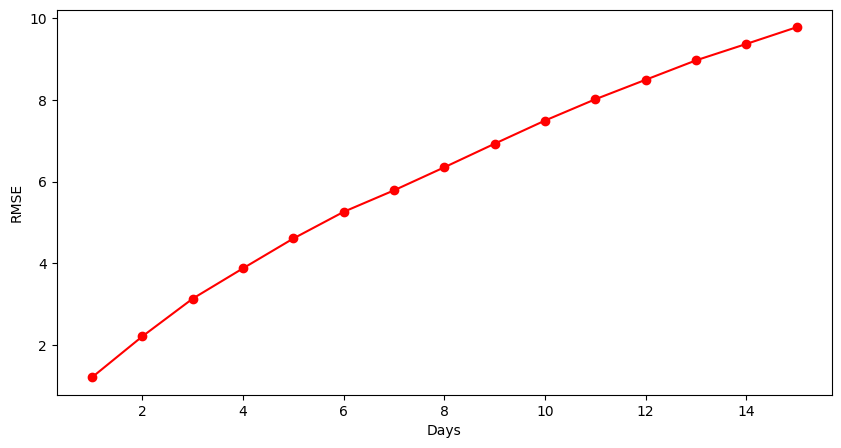

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

# Visualitzem l'error específic en cada punt de predicció (dia)
plt.figure(figsize=(10, 5))
plt.plot(range(1,16), RMSE_days, color='r', marker='o')
plt.xlabel('Days')
plt.ylabel('RMSE')
plt.show()

## Exercici 4: Comentaris finals (_1 punt_)

Finalment, respon a les següents preguntes **justificant la teva resposta** i **relacionant-la amb els resultats** que has obtingut en aquesta activitat:

1. Comenta els resultats obtinguts pel model predictiu. En quina escala estan representats els rangs d'error? Creus que són acceptables?
2. Quines conclusions extreus d'aquesta activitat?

In [129]:
def comprova_per_dies(resultats):
    for i, x in enumerate(resultats):
        print(f"Error en els pròxims {i+1} dies: {x} hm3")

comprova_per_dies(RMSE_days)

Error en els pròxims 1 dies: 1.2037436784409976 hm3
Error en els pròxims 2 dies: 2.2073770711936582 hm3
Error en els pròxims 3 dies: 3.1319673025573547 hm3
Error en els pròxims 4 dies: 3.875657235374449 hm3
Error en els pròxims 5 dies: 4.606352907194541 hm3
Error en els pròxims 6 dies: 5.260203211982925 hm3
Error en els pròxims 7 dies: 5.786806103563743 hm3
Error en els pròxims 8 dies: 6.35219090241045 hm3
Error en els pròxims 9 dies: 6.930339938670288 hm3
Error en els pròxims 10 dies: 7.49798844891914 hm3
Error en els pròxims 11 dies: 8.020293559650783 hm3
Error en els pròxims 12 dies: 8.497907453958346 hm3
Error en els pròxims 13 dies: 8.973731296583235 hm3
Error en els pròxims 14 dies: 9.376574785751965 hm3
Error en els pròxims 15 dies: 9.78610898720368 hm3


- En el gràfic es mostra l'error mitjà al quadrat (MSE) en forma de l'arrel quadrada del mean_squared_error(x,y), on a cada dia, aquest correspon a l'error acumulat des del dia 0 fins al dia considerat. És a dir, al primer dia s'indica l'arrel quadrada d'aquest error per al dia 1, i al dia 15 es consideren tots els dies des del 1 fins al 15. Això implica que la funció és creixent.

- Els valors que es comparen per calcular l'error són els valors (no normalitzats) del volum de l'embassament. A la funció mean_squared_error(x,y), l'atribut x és un conjunt de valors que corresponen als valors reals (observats), mentre que l'atribut y representa els valors predits. Observant la fórmula utilitzada en el càlcul:

<center><img src="mse.png" width="400" /></center>

- Observem que el resultat és la suma dels quadrats de l'error dividit pel nombre d'elements en cada conjunt. Posteriorment, s'extreu l'arrel quadrada d'aquest resultat i s'emmagatzema com a variable de resultat. A partir d'aquestes operacions, es pot observar que el rang d'aquests valors s'estén de 0 (sense error en les prediccions) fins a infinit (error infinitament gran en cada predicció).

- Amb la fórmula i els càlculs realitzats a la funció evaluate_forecasts(), és sabut que l'error resultant pot ser representat en hm3, la unitat original utilitzada en els vectors d'observació i predicció.

- Considerem que els resultats obtinguts en les prediccions són satisfactoris, ja que l'error mitjà per dia no supera els hm3. Per exemple, en una predicció de 7 dies, l'error no excedeix els 6 hm3 (5.78). A més, en el gràfic, es pot observar que la funció no creix de manera lineal i que la seva taxa de creixement disminueix amb el pas del temps.